# Exponential curve fitting

Given data points in **exp.csv** $(x_1,y_1), \dots, (x_{50}, y_{50})$, find the curve in the form $ y = c*e^{ax} $  that "best" fit the data

In [2]:
using CSV, DataFrames, Plots
df = CSV.read("exp.csv", DataFrame)

Row,x1,x2
,Float64,Float64
1,1.94703,72.3893
2,3.92518,2576.36
3,0.929877,9.35796
4,8.83171,1.76374e7
5,4.82066,12908.1
6,7.17234,8.89733e5
7,4.84823,13565.3
8,8.04446,4.27585e6
9,5.19321,25241.5


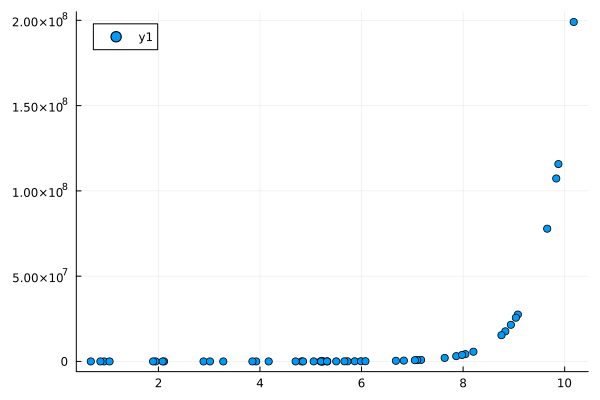

In [3]:
xy = Matrix(df)
scatter(xy[:,1], xy[:,2])

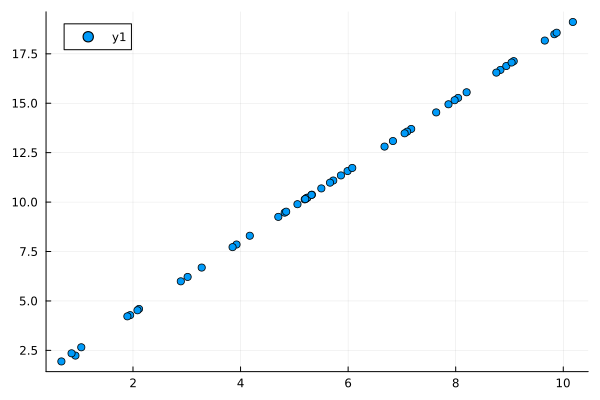

In [4]:
scatter(xy[:,1], log.(xy[:,2]))

From the observed data points, finding the curve in the form $ y = c*e^{ax} $  that "best" fits the data is also equivalent to finding the line that fits $log(y) = log(c) + ax$

Refer to `linefitting.ipynb` for derivation.

In [6]:
xs = xy[:, 1]
log_ys = log.(xy[:, 2])
n = length(xs)

sum_x = sum(xs)
sum_x_sq = sum(xs.^2)
sum_y = sum(log_ys)
sum_xy = sum(xs.*log_ys)

coeff = [sum_x_sq sum_x; sum_x n]  
res = [sum_xy, sum_y]

#inp = inv(coeff)*res 
inp = coeff\res 

a, c_prime = inp

a, c_prime 

(1.8036258903133222, 0.762853297332502)

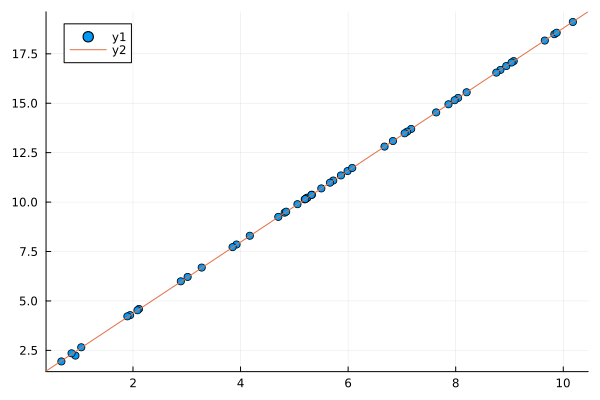

In [8]:
using Plots
scatter(xy[:,1], log.(xy[:,2]))
Plots.abline!(a,c_prime)

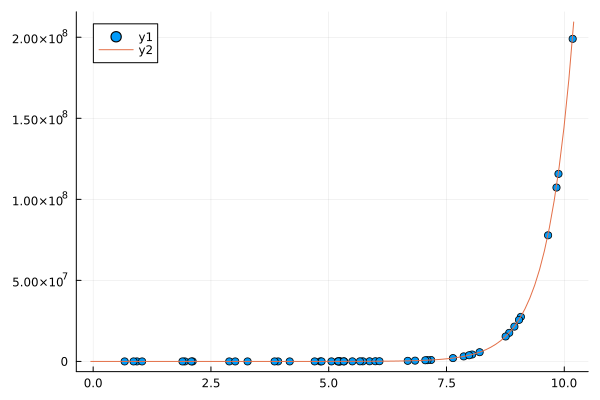

In [16]:
c = exp(c_prime)
x = range(-.05, 10.2, length=100)
y = c*exp.(a*x)
scatter(xy[:,1], xy[:,2])
plot!(x, y)

In [17]:
a, c

(1.8036258903133222, 2.1443860707975175)